In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Data Preparation and EDA

In [86]:
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [87]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             418 non-null    int64  
 1   n_days         418 non-null    int64  
 2   status         418 non-null    object 
 3   drug           312 non-null    object 
 4   age            418 non-null    int64  
 5   sex            418 non-null    object 
 6   ascites        312 non-null    object 
 7   hepatomegaly   312 non-null    object 
 8   spiders        312 non-null    object 
 9   edema          418 non-null    object 
 10  bilirubin      418 non-null    float64
 11  cholesterol    284 non-null    float64
 12  albumin        418 non-null    float64
 13  copper         310 non-null    float64
 14  alk_phos       312 non-null    float64
 15  sgot           312 non-null    float64
 16  tryglicerides  282 non-null    float64
 17  platelets      407 non-null    float64
 18  prothrombi

* It can be seen that the dataset consists of 20 columns, with 418 records in total.
* However, it is observed that the administered medicine column has null records. It will be decided to eliminate these empty records in their entirety, since not having a medical background, the analysis could be affected if drugs are placed at random or those that would not correspond appropriately.

In [88]:
df.dropna(subset=['drug'],inplace=True)
df.isna().sum()

id                0
n_days            0
status            0
drug              0
age               0
sex               0
ascites           0
hepatomegaly      0
spiders           0
edema             0
bilirubin         0
cholesterol      28
albumin           0
copper            2
alk_phos          0
sgot              0
tryglicerides    30
platelets         4
prothrombin       0
stage             0
dtype: int64

In [89]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             312 non-null    int64  
 1   n_days         312 non-null    int64  
 2   status         312 non-null    object 
 3   drug           312 non-null    object 
 4   age            312 non-null    int64  
 5   sex            312 non-null    object 
 6   ascites        312 non-null    object 
 7   hepatomegaly   312 non-null    object 
 8   spiders        312 non-null    object 
 9   edema          312 non-null    object 
 10  bilirubin      312 non-null    float64
 11  cholesterol    284 non-null    float64
 12  albumin        312 non-null    float64
 13  copper         310 non-null    float64
 14  alk_phos       312 non-null    float64
 15  sgot           312 non-null    float64
 16  tryglicerides  282 non-null    float64
 17  platelets      308 non-null    float64
 18  prothrombi

* Now, there are 312 records that have a drug assigned
* There are still missing values in various features. These values will be entered using the mean, since they are float64 type trying to lose the least amount of information possible.

In [90]:
df = df.fillna(df.mean())
df.isna().sum()

C:\Users\cachu\AppData\Local\Temp\ipykernel_12188\840287908.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


id               0
n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64

In [91]:
df.head()

,id,n_days,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [92]:
df['status'].unique()

array(['D', 'C', 'CL'], dtype=object)

* We can see that the objective variable, `status`, has 3 classes "D", "C", "CL", where the last two refer to people who have the disease and are alive, while the first includes those patients who already died. Therefore, the two categories of living patients will be encapsulated into one, with the purpose of having a binary classification.

In [94]:
status_mapping = {
    'C': 1,
    'CL': 1,
    'D': 0
}

df['status'] = df['status'].replace(status_mapping)
df.head()

,id,n_days,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
0,1,400,0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


* We also have the `age` feature but registered in days. For a better understanding, this column will be transformed to have the information in completed years.

In [95]:
df["age"] = (np.floor(df["age"] / 365.25))
df.head()

,id,n_days,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
0,1,400,0,D-penicillamine,58.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,D-penicillamine,54.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Age

In [96]:
df.age.describe()

count    312.000000
mean      49.493590
std       10.576621
min       26.000000
25%       41.750000
50%       49.000000
75%       56.000000
max       78.000000
Name: age, dtype: float64

In [97]:
range_age = df.age.max() - df.age.min()
range_age

52.0

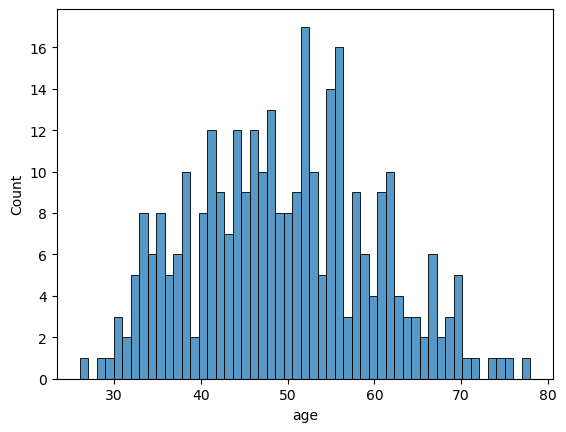

In [98]:
sns.histplot(df.age, bins=52+1)
plt.show()

* We can observe a distribution that simulates the normal one in the age of the patients in the study, finding the largest number of patients between the ages of 40 to 60 years.

In [105]:
mutual_info_score(round(df.age), df.status)

0.14127796026650646

* We can see that the mutual information shared by `age` and the target feature is small.

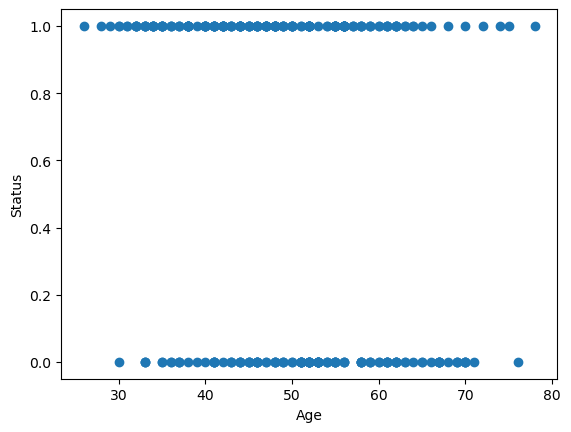

In [101]:
plt.scatter(df.age, df.status)
plt.xlabel('Age')
plt.ylabel('Status')
plt.show()

* We can see that there is no clear division between the age of the patients and their `status`

### copper

In [102]:
df.copper.describe()

count    312.000000
mean      97.648387
std       85.338190
min        4.000000
25%       41.750000
50%       73.000000
75%      123.000000
max      588.000000
Name: copper, dtype: float64

In [103]:
range_copp = df.copper.max() - df.copper.min()
range_copp

584.0

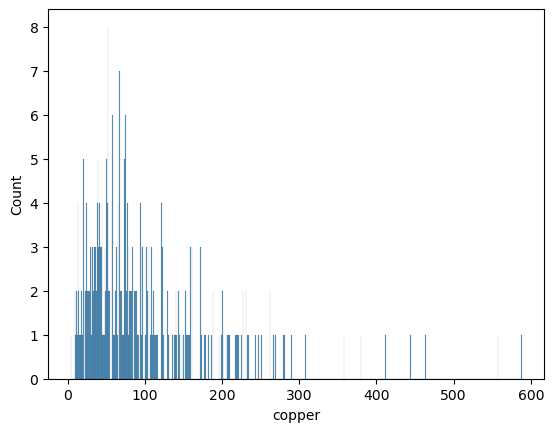

In [104]:
sns.histplot(df.copper, bins=584+1)
plt.show()

* We can see that most pacients have a copper in urine level between 0 and 100. Normal range is considered to be 20 - 60, but it depends on age, sex, etc.

In [106]:
mutual_info_score(round(df.copper), df.status)

0.3654748591440361

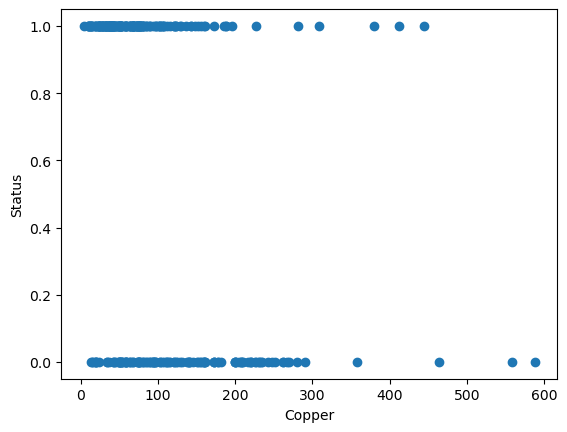

In [107]:
plt.scatter(df.copper, df.status)
plt.xlabel('Copper')
plt.ylabel('Status')
plt.show()

* We will drop ID and n_days since they are just registers for identifying a patient and the days since their registration in the study.

In [108]:
del df['id']
del df['n_days']
df.head()

,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
0,0,D-penicillamine,58.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,0,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,0,D-penicillamine,54.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Relation among all features

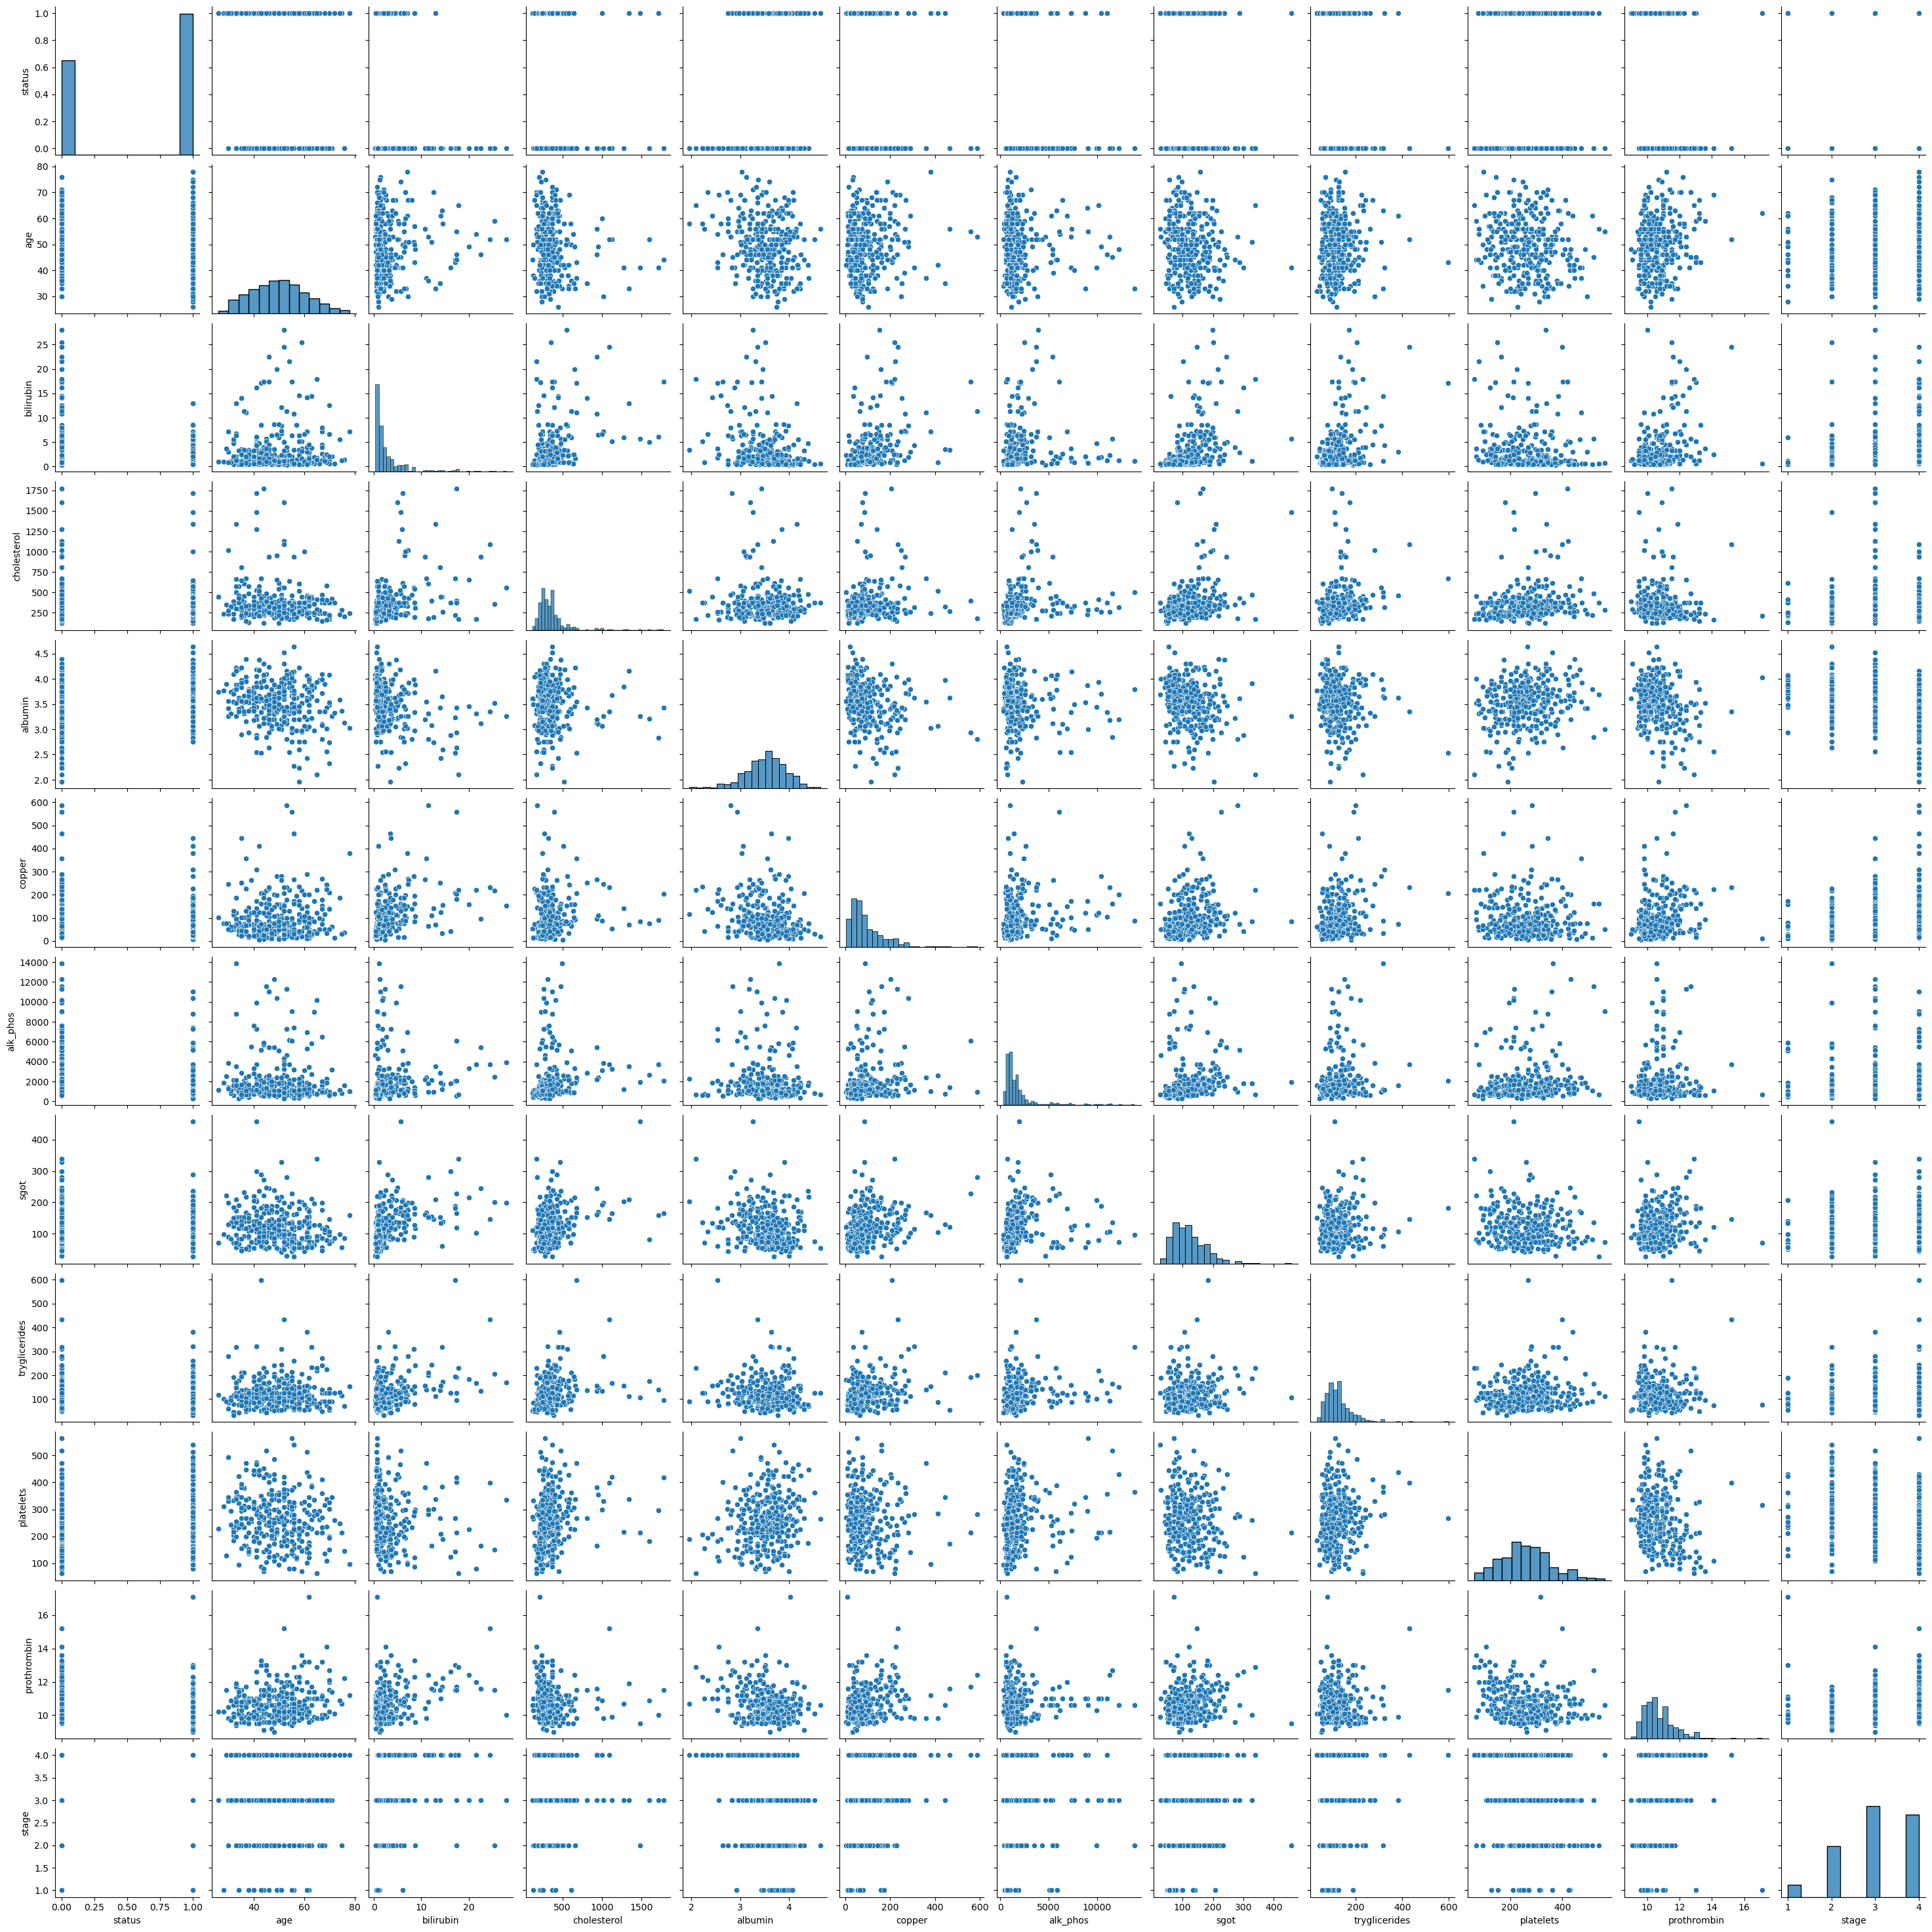

In [109]:
sns.pairplot(df)

## Model Selection

In [112]:
df_train, df_val = train_test_split(df, test_size=0.20, random_state=1, stratify=df.status)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.status.values
y_val = df_val.status.values

del df_train['status']
del df_val['status']

In [115]:
len(df_train), len(df_val), len(y_train), len(y_val)

(249, 63, 249, 63)

In [113]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

### Logistic regression

In [117]:
log_reg = LogisticRegression(solver='liblinear', random_state=1)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)

In [119]:
confusion_matrix(y_val, y_pred)

array([[16,  9],
       [ 2, 36]], dtype=int64)

In [120]:
print('Accuracy', accuracy_score(y_val, y_pred))

Accuracy 0.8253968253968254


In [134]:
print('ROC_AUC', roc_auc_score(y_val, y_pred))

ROC_AUC 0.46789473684210525


* We can see that although the accuracy is relatively good, its auc value is very low

### Decision Trees

In [133]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
y_pred = dt.predict(X_val)
print('Accuracy', accuracy_score(y_val, y_pred))
print('ROC_AUC', roc_auc_score(y_val, y_pred))

Accuracy 0.7301587301587301
ROC_AUC 0.721578947368421


* The model trained with decision trees showed better performance, so a parameter tunning will be made to find the best possible model.

### Decision trees parameter tuning

In [137]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.762
   2 -> 0.777
   3 -> 0.727
   4 -> 0.722
   5 -> 0.770
   6 -> 0.706
  10 -> 0.775
  15 -> 0.742
  20 -> 0.788
None -> 0.702


In [138]:
scores = []

for depth in [20, 2, 10]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [139]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [140]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth            2      10     20
min_samples_leaf                     
1                 0.777  0.735  0.702
5                 0.777  0.826  0.826
10                0.777  0.769  0.793
15                0.777  0.785  0.795
20                0.777  0.817  0.817
100               0.762  0.762  0.762
200               0.500  0.500  0.500
500               0.500  0.500  0.500

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

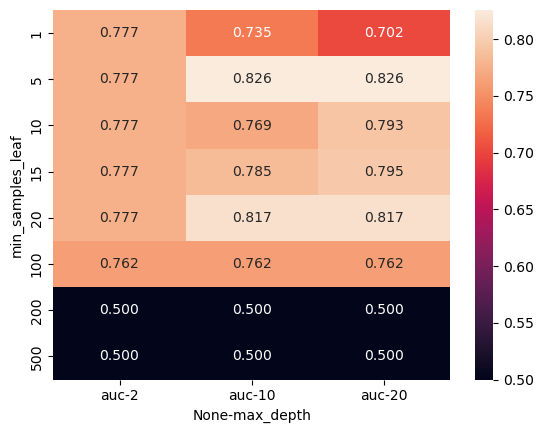

In [141]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

* According to the results obtained, a max_depth of 20 and a min_samples_leaf of 5 will be chosen. 

## Final Model

In [154]:
final_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=1)
final_model.fit(X_train, y_train)

#y_pred = final_model.predict_proba(X_val)[:, 1]
y_pred = final_model.predict(X_val)
print('Accuracy: ', accuracy_score(y_val, y_pred))
print('ROC_AUC: ', roc_auc_score(y_val, y_pred))      

Accuracy:  0.7619047619047619
ROC_AUC:  0.7410526315789473
